In [1]:
import pandas as pd
import datetime as dt


In [2]:
stk_data=pd.read_csv("AxisBank_Stock.csv")

In [3]:
stk_data

,Open,High,Low,Close,Adj Close,Volume
0,750.000000,754.400024,744.500000,746.450012,744.555725,5695690
1,747.599976,752.849976,744.000000,750.650024,748.745117,3557647
2,757.099976,762.000000,753.400024,760.349976,758.420410,4680089
3,757.000000,767.000000,755.200012,758.349976,756.425476,5529485
4,755.900024,764.000000,752.250000,762.900024,760.963989,3573368
...,...,...,...,...,...,...
139,731.049988,737.150024,722.150024,728.900024,727.050232,8505400
140,722.000000,725.250000,708.049988,712.500000,710.691895,10689060
141,715.000000,716.400024,688.200012,704.599976,702.811890,8812501
142,714.000000,755.000000,708.599976,752.200012,750.291138,38088158


In [4]:
stkdata=stk_data[["Open","High","Low","Close"]]


In [5]:
stkdata

,Open,High,Low,Close
0,750.000000,754.400024,744.500000,746.450012
1,747.599976,752.849976,744.000000,750.650024
2,757.099976,762.000000,753.400024,760.349976
3,757.000000,767.000000,755.200012,758.349976
4,755.900024,764.000000,752.250000,762.900024
...,...,...,...,...
139,731.049988,737.150024,722.150024,728.900024
140,722.000000,725.250000,708.049988,712.500000
141,715.000000,716.400024,688.200012,704.599976
142,714.000000,755.000000,708.599976,752.200012


In [6]:
column="Close"
from sklearn.preprocessing import MinMaxScaler
ms=MinMaxScaler()
data1=ms.fit_transform(stk_data[[column]])
print("Length : ",data1.shape)

Length :  (144, 1)


In [7]:
training_size=round(len(data1)*0.80)
print("Training Size : ",training_size)
x_train=data1[:training_size]
x_test=data1[training_size:]
print("x_train length : ", x_train.shape)
print("x_test length : " , x_test.shape)
y_train=data1[:training_size]
y_test=data1[training_size:]
print("y_train length : ", y_train.shape)
print("y_test length : " , y_test.shape)

Training Size :  115
x_train length :  (115, 1)
x_test length :  (29, 1)
y_train length :  (115, 1)
y_test length :  (29, 1)


In [8]:
import warnings
warnings.filterwarnings("ignore")

In [14]:
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
#trends=['n','t','c','ct']
orders=[(1,1,1),(1,1,2),(2,2,1),(2,1,1)]
for od in orders:
    model=ARIMA(x_train,order=od)
    model_fit=model.fit()
    # making prediction
    y_pred=model_fit.predict(len(x_train),len(data1)-1)
    from stockFunctions import rmsemape
    print("Order : {}  ". format(od))
    rmsemape(y_test,y_pred)
    print("_______________________________________")

Order : (1, 1, 1)  
RMSE-Testset: 0.15927478701187123
maPe-Testset: 0.8205373451150468
_______________________________________


C:\Users\ELCOT\anaconda3\envs\aidata\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Order : (1, 1, 2)  
RMSE-Testset: 0.1570540320796666
maPe-Testset: 0.9333613785097856
_______________________________________
Order : (2, 2, 1)  
RMSE-Testset: 0.17324223272616035
maPe-Testset: 0.8301951901890415
_______________________________________
Order : (2, 1, 1)  
RMSE-Testset: 0.15909944476752558
maPe-Testset: 0.8091163983073395
_______________________________________


In [15]:
od=(2,1,1)

model=ARIMA(x_train,order=od)
model_fit=model.fit()
# making prediction
y_pred=model_fit.predict(len(x_train),len(data1)-1)
from stockFunctions import rmsemape
print("Order : {} ". format(od))
rmsemape(y_test,y_pred)
print("_______________________________________")

Order : (2, 1, 1) 
RMSE-Testset: 0.15909944476752558
maPe-Testset: 0.8091163983073395
_______________________________________


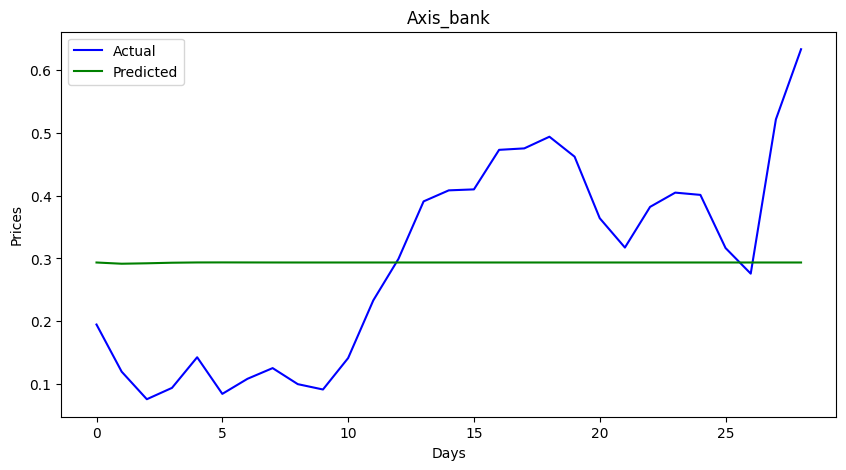

In [16]:
from stockFunctions import graph
graph(y_test,y_pred,"Actual","Predicted","Axis_bank","Days","Prices")

In [17]:
from stockFunctions import conversionSingle
aTestNormTable=conversionSingle(y_test,[column])
actual_stock_price_test_ori=ms.inverse_transform(aTestNormTable)
actual_stock_price_test_oriA=conversionSingle(actual_stock_price_test_ori,[column])

In [18]:
from stockFunctions import conversionSingle
pTestNormTable=conversionSingle(y_pred,[column])
predicted_stock_price_test_ori=ms.inverse_transform(pTestNormTable)
predicted_stock_price_test_oriP=conversionSingle(predicted_stock_price_test_ori,[column])

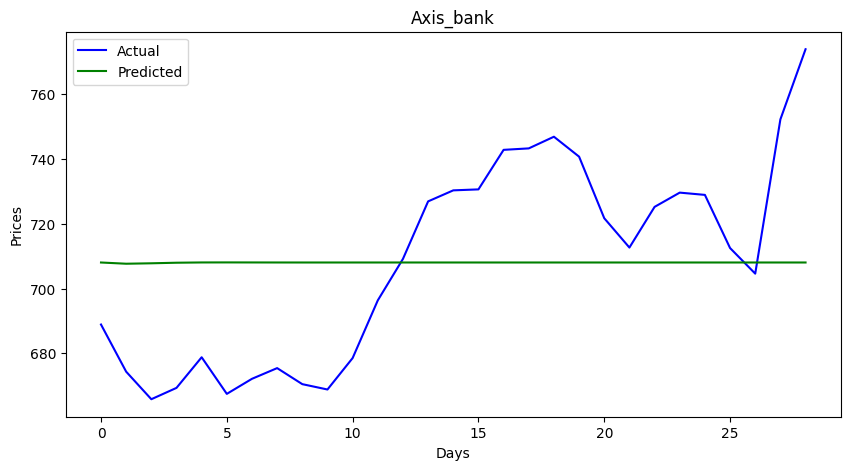

In [19]:
from stockFunctions import graph
graph(actual_stock_price_test_oriA,predicted_stock_price_test_oriP,"Actual","Predicted","Axis_bank","Days","Prices")

In [20]:
from stockFunctions import rmsemape
rmsemape(actual_stock_price_test_oriA,predicted_stock_price_test_oriP)

RMSE-Testset: 30.86529228489996
maPe-Testset: 0.038601102801267724


In [21]:
forecast=model_fit.predict(len(data1), len(data1)+3)
forecast

array([0.29351123, 0.29351123, 0.29351123, 0.29351123])

In [22]:
from stockFunctions import conversionSingle
fTestNormTable=conversionSingle(forecast,["CloseFore"])
forecast_stock_price_test_ori=ms.inverse_transform(fTestNormTable)
forecast_stock_price_test_orif=conversionSingle(forecast_stock_price_test_ori,["CloseFore"])

In [23]:
forecast_stock_price_test_orif

,CloseFore
0,708.041155
1,708.041155
2,708.041155
3,708.041155


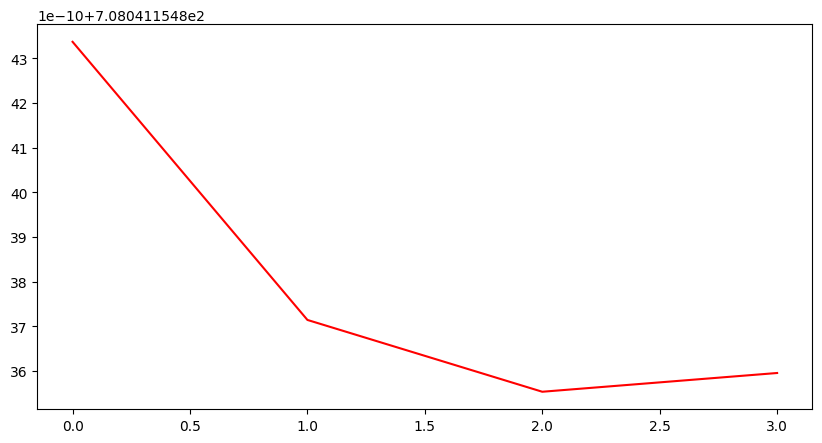

In [24]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(actual_stock_price_test_oriA[116:145], color = 'blue', label="Actual")
plt.plot(forecast_stock_price_test_orif, color = 'red', label ="Predicted")